# INFO 2950 Project Phase IV
GitHub Repo: https://github.com/gaby-chu/info2950

In [4]:
## load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.cluster import KMeans

In [12]:
bilingual_demographic_data = pd.read_csv("bilingual_demographic-data.csv")

### Exploratory Data Analysis

## Data Analysis and Evaluation of Significance

#### Predicting language program from demographic data through multinomial logistic regression

Our first analysis involves using a multinomial logistics regression model to try and predict the bilingual language program given the ethnic breakdown of the school. Looking at our data, it was clear that it was necessary to drop certain language programs because there was not enough data to support using them. Languages such as Arabic, Korean, Haitian Creole, and Japanese only had one school offering them as the bilingual language. Therefore, we limitted our analyses to the top three most common languages in the bilingual programs - Spanish, Chinese, and French. 

In [13]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

### Do schools with certain language programs have higher academic performance?

In [14]:
academic_data = pd.read_csv("2014-15_to_2017-19_NYC_Regents_Exam_Results_-_Public.csv")

In [15]:
academic_data

,Unnamed Column,School DBN,School Name,School Type,School Level,Regents Exam,Year,Category,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,08X5072015All StudentsGeometry,08X507,Stevenson Yabc,YABC,High school,Geometry,2015,All Students,1,s,s,s,s,s,s,s,s,s
1,01M1842018All StudentsLiving Environment,01M184,P.S. 184m Shuang Wen,General Academic,K-8,Living Environment,2018,All Students,32,90.2,0,0.0,32,100.0,31,96.9,na,na
2,01M4582019All StudentsSpanish,01M458,Forsyth Satellite Academy,Transfer School,High school,Spanish,2019,All Students,1,s,s,s,s,s,s,s,s,s
3,01M5092017All StudentsSpanish,01M509,Marta Valle High School,General Academic,High school,Spanish,2017,All Students,16,82.7,0,0.0,16,100.0,10,62.5,na,na
4,02M2982015All StudentsGeometry,02M298,Pace High School,General Academic,High school,Geometry,2015,All Students,163,62.9,81,49.7,82,50.3,13,8.0,13,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33026,84X7172017All StudentsLiving Environment,84X717,Icahn Charter School,General Academic,K-8,Living Environment,2017,All Students,10,79.7,0,0.0,10,100.0,5,50.0,na,na
33027,84X7172018All StudentsCommon Core Algebra,84X717,Icahn Charter School,General Academic,K-8,Common Core Algebra,2018,All Students,15,86.9,0,0.0,15,100.0,15,100.0,15,100.0
33028,84X7172018All StudentsLiving Environment,84X717,Icahn Charter School,General Academic,K-8,Living Environment,2018,All Students,9,85.3,0,0.0,9,100.0,8,88.9,na,na
33029,84X7172019All StudentsCommon Core Algebra,84X717,Icahn Charter School,General Academic,K-8,Common Core Algebra,2019,All Students,15,93.2,0,0.0,15,100.0,15,100.0,15,100.0


In [16]:
academic_data = academic_data.rename(columns={"Unnamed Column": "school_test", "School DBN": "DBN", "School Name": "school_name_x",
                                              "School Level": "School Category", "Year": "year", "Regents Exam": "regents", "Mean Score": "mean_score"})

academic_data = academic_data.loc[academic_data.mean_score != 's']
academic_data['mean_score'] = academic_data['mean_score'].astype(float)

## math tests
math_tests = academic_data.loc[(academic_data["regents"] == "Common Core Algebra") |  (academic_data["regents"] == "Common Core Algebra2") | (academic_data["regents"] == "Common Core Geometry") |
                             (academic_data["regents"] == "Integrated Algebra") | (academic_data["regents"] == "Geometry") | (academic_data["regents"] == "Algebra2/Trigonometry")]
math_tests = math_tests.rename(columns = {"mean_score": "math_score"})
mean_math_score = math_tests.groupby("DBN").math_score.mean()

## language tests
fl_tests = academic_data.loc[(academic_data["regents"] == "Spanish") |  (academic_data["regents"] == "French") | (academic_data["regents"] == "Chinese") |
                             (academic_data["regents"] == "Italian")]
fl_tests = fl_tests.rename(columns = {"mean_score": "fl_score"})
mean_fl_score = fl_tests.groupby("DBN").fl_score.mean()

## history tests
history_tests = academic_data.loc[(academic_data["regents"] == "Global History and Geography") |  (academic_data["regents"] == "U.S. History and Government")]
history_tests = history_tests.rename(columns = {"mean_score": "history_score"})
mean_history_score = history_tests.groupby("DBN").history_score.mean()

## science tests
science_tests = academic_data.loc[(academic_data["regents"] == "Living Environment") |  (academic_data["regents"] == "Physical Settings/Chemistry") |
                                  (academic_data["regents"] == "Physical Settings/Earth Science") |  (academic_data["regents"] == "Physical Settings/Physics") ]
science_tests = science_tests.rename(columns = {"mean_score": "science_score"})
mean_science_score = science_tests.groupby("DBN").science_score.mean()

## english tests
english_tests = academic_data.loc[(academic_data["regents"] == "Common Core English") |  (academic_data["regents"] == "English") ]
english_tests = english_tests.rename(columns = {"mean_score": "english_score"})
mean_english_score = english_tests.groupby("DBN").english_score.mean()

# create dataframe of all the mean subject scores
mean_subject_scores = pd.DataFrame([mean_math_score])
mean_subject_scores = mean_subject_scores.append(mean_fl_score).append(mean_history_score).append(mean_science_score).append(mean_english_score)
mean_subject_scores = mean_subject_scores.transpose()

In [17]:
# merge bilingual data and mean subject scores to perform data analysis

academic_performance_data = bilingual_demographic_data.merge(mean_subject_scores, on = "DBN")
academic_performance_data = academic_performance_data.loc[(academic_performance_data['Language'] == 'Spanish') | (academic_performance_data['Language'] == 'Chinese') | (academic_performance_data['Language'] == 'French')]
display(academic_performance_data)

,Borough,Borough/Citywide Office (B/CO),District,DBN,school_name_x,School Category,Program,Language,General/Special Education,school_name_y,...,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,math_score,fl_score,history_score,science_score,english_score
0,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,General Education,P.S. 184m Shuang Wen,...,99,0.140,469,66.3%,67.2,84.520000,NaN,NaN,87.733333,NaN
1,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,Special Education,P.S. 184m Shuang Wen,...,99,0.140,469,66.3%,67.2,84.520000,NaN,NaN,87.733333,NaN
2,Manhattan,Manhattan,1,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Dual Language,Chinese,General Education,School for Global Leaders,...,17,0.083,172,84.3%,84.7,75.460000,NaN,NaN,NaN,NaN
3,Manhattan,Manhattan,2,02M131,M.S. 131,Junior High-Intermediate-Middle,Dual Language,Chinese,General Education,M.S. 131,...,70,0.230,269,88.5%,85.1,86.466667,NaN,NaN,82.025000,NaN
4,Manhattan,Bronx,2,02M542,Manhattan Bridges High School,High school,Dual Language,Spanish,General Education,Manhattan Bridges High School,...,189,0.363,443,85.2%,92.7,67.970000,88.84,72.86,67.020000,73.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Brooklyn,Brooklyn North,32,32K349,"I.S. 349 Math, Science & Tech.",Junior High-Intermediate-Middle,Dual Language,Spanish,General Education,"I.S. 349 Math, Science & Tech.",...,53,0.178,281,94.3%,93.4,74.750000,NaN,NaN,67.750000,NaN
80,Brooklyn,Brooklyn North,32,32K384,P.S. /I.S. 384 Frances E. Carter,K-8,Dual Language,Spanish,General Education,P.S. /I.S. 384 Frances E. Carter,...,93,0.209,382,85.8%,90.6,NaN,NaN,NaN,65.150000,NaN
81,Brooklyn,Brooklyn North,32,32K384,P.S. /I.S. 384 Frances E. Carter,K-8,Dual Language,Spanish,Special Education,P.S. /I.S. 384 Frances E. Carter,...,93,0.209,382,85.8%,90.6,NaN,NaN,NaN,65.150000,NaN
82,Brooklyn,Brooklyn North,32,32K556,Bushwick Leaders High School for Academic Exce...,High school,Dual Language,Spanish,Special Education,Bushwick Leaders High School for Academic Exce...,...,92,0.271,Above 95%,Above 95%,93.4,50.283333,84.30,55.13,52.830769,56.657143


In [18]:
spanish_academic_performance = academic_performance_data.loc[academic_performance_data['Language'] == 'Spanish'] 
chinese_academic_performance = academic_performance_data.loc[academic_performance_data['Language'] == 'Chinese'] 
french_academic_performance = academic_performance_data.loc[academic_performance_data['Language'] == 'French']
print(len(spanish_academic_performance))
print(len(chinese_academic_performance))
print(len(french_academic_performance))

spanish_math = spanish_academic_performance['math_score']
chinese_math = chinese_academic_performance['math_score']
french_math = french_academic_performance['math_score']


65
10
5


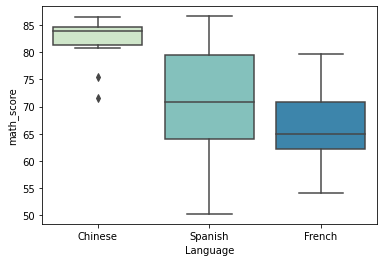

In [19]:
sns.boxplot(x='Language',y='math_score',data=academic_performance_data, palette='GnBu');

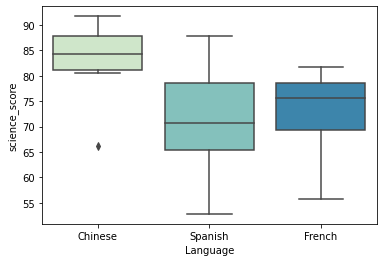

In [20]:
sns.boxplot(x='Language',y='science_score',data=academic_performance_data, palette='GnBu');

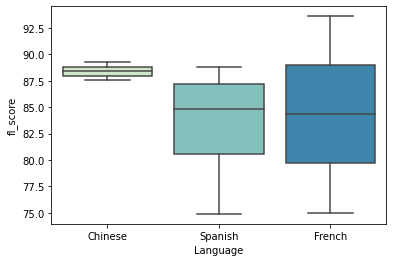

In [21]:
sns.boxplot(x='Language',y='fl_score',data=academic_performance_data, palette='GnBu');

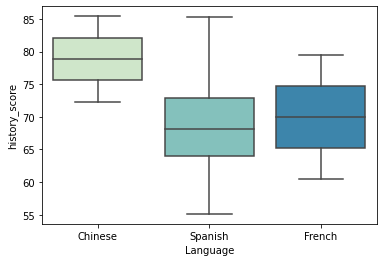

In [22]:
sns.boxplot(x='Language',y='history_score',data=academic_performance_data, palette='GnBu');

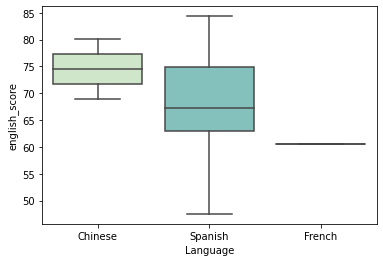

In [23]:
sns.boxplot(x='Language',y='english_score',data=academic_performance_data, palette='GnBu');

nan nan


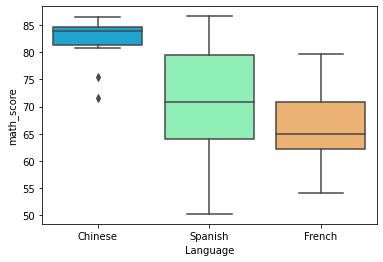

In [25]:
# BOX PLOT - economic need index vs. language of the school

chosen_language_data = academic_performance_data.loc[(academic_performance_data['Language'] == 'Spanish') | (academic_performance_data['Language'] == 'Chinese') | (academic_performance_data['Language'] == 'French')]

sns.boxplot(x='Language',y='math_score',data=chosen_language_data, palette='rainbow');

# [KEEP, PERFORM ANOVA]


import scipy.stats as stats

F, p = stats.f_oneway(academic_performance_data['math_score'][chosen_language_data['Language'] == 'Spanish'],
               academic_performance_data['math_score'][chosen_language_data['Language'] == 'Chinese'],
               academic_performance_data['math_score'][chosen_language_data['Language'] == 'French'])
print(F, p)


# SOURCE: https://www.reneshbedre.com/blog/anova.html
# significant b/c p < 0.05
    
# talk about null hypothesis + difference between the means? [WHAT IS ANOVA EXACTLY MEASURING]
# INTERPRETATION: The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.
# F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value.
